#### Version 2.0

The project I am working on requires me to build and hopefully deploy a machine learning model. I am part of the TIA group, which focuses on the waste management problem in South Africa.

My group's solution is mainly around the idea of a smart bin. 

The algorithm I will be using in this project is Deep Learning's Convolutional Neural Network. Which is widely used and praised for its accuracy and performance on image classification. In this project, I will be classifying images of waste. 

#### Import the essential packages that will be used.

In [1]:
# deep learning
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint

# saving model
import pickle

# visualization
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from keras.utils.vis_utils import plot_model

# processing and data generation
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras import backend as K

#### Directory and define the labels/features

* I'm giving the images a fixed width and height of 200 x 200.
* train_data_dir and validation_data_dir are the locations of the data
* For this model, we will be using 400 samples for training and 100 samples for validating.
* We will use 50 for the batch size and 20 epochs.

ref: https://docs.paperspace.com/machine-learning/wiki/epoch

In [2]:
# set the image dimenions, all images will have height & width set to 200x200
img_width, img_height = 200, 200

# directory
train_data_dir = 'organic_and_recyclable/'
validation_data_dir = 'organic_and_recyclable/'

# amount of samples that will be used in training and validation sets
nb_train_samples = 400
nb_validation_samples = 100

# An epoch elapses when an entire dataset is passed forward and backward through the neural network exactly one time
epochs = 20
# Batch size is the total number of training samples present in a single min-batch
batch_size = 50

#### Clean data

Here we are checking if the image is in the right format. For our model we will use RGB, since its waste images, it wiser to keep the color of the images as well. With dimensions 200 x 200.

ref: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
ref: https://www.codesofinterest.com/2017/09/keras-image-data-format.html

In [3]:
if K.image_data_format() == 'channels_first': #rgb
    input_shape = (3, img_width, img_height) # 3 for 3 layers
else:
    input_shape = (img_width, img_height, 3)

#### Generate training and tests sets

Below are the references, you can go see what the parameters are.

ref: https://vijayabhaskar96.medium.com/tutorial-on-keras-imagedatagenerator-with-flow-from-dataframe-8bd5776e45c1
ref: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory

In [4]:
# preprocessing the training set
train_data_gen = ImageDataGenerator(rescale = 1. / 255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

In [5]:
# preprocessing the test set
test_data_gen = ImageDataGenerator(rescale = 1. / 255)

In [6]:
# generate the data
train_generator = train_data_gen.flow_from_directory(
    train_data_dir, target_size=(img_width, img_height), color_mode="rgb", batch_size=batch_size, class_mode = 'binary')

Found 671 images belonging to 2 classes.


In [7]:
# generate the data
validation_generator = test_data_gen.flow_from_directory(
    validation_data_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode = 'binary')

Found 671 images belonging to 2 classes.


Above you can see, they are 671 images each for the two classes that we will be using in our CNN model.

Below you can the 2 classes that are being mentioned above. 
Class O for Organic and Class R for Recyclable

In [8]:
print(train_generator.class_indices)

{'O': 0, 'R': 1}


#### Create neural network
Create neural network with Keras's Sequential

ref: https://keras.io/api/models/sequential/
ref: https://www.ibm.com/cloud/learn/convolutional-neural-networks#toc-convolutio-JgBTyG9C
ref: https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53
ref: https://www.tensorflow.org/tutorials/images/classification
ref: https://keras.io/api/layers/convolution_layers/convolution2d/
ref: https://medium.com/analytics-vidhya/a-guide-to-neural-network-layers-with-applications-in-keras-40ccb7ebb57a
ref: https://www.upgrad.com/blog/basic-cnn-architecture/
ref: https://www.geeksforgeeks.org/activation-functions-neural-networks/
ref: https://www.baeldung.com/cs/ml-relu-dropout-layers#:~:text=The%20Dropout%20layer%20is%20a%20mask%20that%20nullifies,in%20which%20case%20it%20nullifies%20some%20hidden%20neurons.
ref: https://tiddler.github.io/optimizers/

In [9]:
# create Sequential object
model = Sequential()

# Add a Convolutional layer
# 32 are the number of output filters in the convolution, 
# (3,3) is tuple/list of a single integer, specifying the length of the 1D convolution window
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
# Activation function is relu
model.add(Activation('relu'))
# Adding our max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a Convolutional layer
model.add(Conv2D(32, (3, 3)))
# Activation function is relu
model.add(Activation('relu'))
# Adding our max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a Convolutional layer
model.add(Conv2D(64, (3, 3)))
# Activation function is relu
model.add(Activation('relu'))
# ading our max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a Convolutional layer
model.add(Conv2D(128, (3, 3)))
# Activation function is relu
model.add(Activation('relu'))
# ading our max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a Convolutional layer
model.add(Conv2D(64, (3, 3)))
# Activation function is relu
model.add(Activation('relu'))
# ading our max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding Our flattening Layer (flatten the image from 2d to 1d image)
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(32))
# Activation function is relu
model.add(Activation('relu'))

# Dropout layers are important in training CNNs because they prevent overfitting on the training data
model.add(Dropout(0.5))

# Add the output layer, one output, whether 0 or 1, sigmoid activation makes this possible
model.add(Dense(1))
# Activation function is sigmoid
model.add(Activation('sigmoid'))

#### Summary

ref: https://www.machinecurve.com/index.php/2020/04/01/how-to-generate-a-summary-of-your-keras-model/
ref: https://izziswift.com/keras-model-summary-result-understanding-the-of-parameters/
ref: https://machinelearningmastery.com/visualize-deep-learning-neural-network-model-keras/#:~:text=Keras%20provides%20a%20way%20to%20summarize%20a%20model.,the%20model.%20The%20output%20shape%20of%20each%20layer.

In [10]:
# Show what was the neural network has done
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 198, 198, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 97, 97, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        1

Below, the size of input images are 200x200. We used 3x3 filters so the size of feature maps are 198x198. 
The size is reduced to half in the first pooling layer. At each convolution-pooling layer pair, the size is reduced but features in the images are preserved (for example the 32, 64 and 128). In this model, we have more than 200k parameters to train, which is a lot.

#### Compiling and Fitting/Training model

In the next steps, we are going to implement EarlyStopping callback from Keras. This stops the model from training when a monitored metric has stopped improving.
Then we move on to compile the model with loss as binary_crossentropy since it's a binary problem and not a categorical problem. (Binary: 0 or 1/O or R). We will accuracy as metrics and adam for the optimizer.
Lastly, we train the model

ref: https://towardsdatascience.com/a-quick-guide-to-neural-network-optimizers-with-applications-in-keras-e4635dd1cca4
ref: https://keras.io/api/callbacks/model_checkpoint/
ref: https://keras.io/api/callbacks/early_stopping/
ref: https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/#:~:text=Early%20Stopping%20in%20Keras%20Keras%20supports%20the%20early,EarlyStopping%20callback%20is%20configured%20when%20instantiated%20via%20arguments.
ref: https://nickmccullum.com/python-deep-learning/convolutional-neural-network-tutorial/#training-the-convolutional-neural-network
ref: https://docs.paperspace.com/machine-learning/wiki/accuracy-and-loss

In [11]:
# patience: Number of epochs with no improvement after which training will be stopped. 
# Since we have 20 epochs, we can have patience = 7. Not too high, not too low.
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=7, verbose=1)

In [12]:
# However, the model at the end of training may not be the model with best performance on the validation dataset. 
# ModelCheckpoint will save the best model observed during training for later use.
model_checkpoint = ModelCheckpoint('best_model_during_training_v1.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [13]:
# compile the model.
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy']) # rmsprop

In [14]:
# fit the model
history_model = model.fit(train_generator, 
          steps_per_epoch = nb_train_samples // batch_size, 
          epochs = epochs, 
          validation_data = validation_generator,
          callbacks=[early_stopping, model_checkpoint],
          validation_steps = nb_validation_samples // batch_size)

Epoch 1/20
8/8 [==============================] - 28s 3s/step - loss: 0.7065 - accuracy: 0.4779 - val_loss: 0.6816 - val_accuracy: 0.5300

Epoch 00001: val_accuracy improved from -inf to 0.53000, saving model to best_model_during_training_v1.h5
Epoch 2/20
8/8 [==============================] - 17s 2s/step - loss: 0.7130 - accuracy: 0.5584 - val_loss: 0.6756 - val_accuracy: 0.7800

Epoch 00002: val_accuracy improved from 0.53000 to 0.78000, saving model to best_model_during_training_v1.h5
Epoch 3/20
8/8 [==============================] - 18s 2s/step - loss: 0.6444 - accuracy: 0.6484 - val_loss: 0.5943 - val_accuracy: 0.7300

Epoch 00003: val_accuracy did not improve from 0.78000
Epoch 4/20
8/8 [==============================] - 21s 3s/step - loss: 0.5493 - accuracy: 0.7861 - val_loss: 0.4583 - val_accuracy: 0.8600

Epoch 00004: val_accuracy improved from 0.78000 to 0.86000, saving model to best_model_during_training_v1.h5
Epoch 5/20
8/8 [==============================] - 19s 2s/step - l

We can see that the model is finished training. At the end of the epoch we have a accuracy rate of 79%, but thanks to ModelCheckpoint we were able to save our best model with accuracy rate of 95%.

This means that EarlyStopping saw no need to stop the epoch before the model start performing bad. Let me elaborate in the performance comparisons.

#### Evaluate the model

ref: https://stackoverflow.com/questions/34518656/how-to-interpret-loss-and-accuracy-for-a-machine-learning-model
ref: https://www.javacodemonk.com/difference-between-loss-accuracy-validation-loss-validation-accuracy-in-keras-ff358faa
ref: https://kharshit.github.io/blog/2018/12/07/loss-vs-accuracy

In [21]:
score = model.evaluate(validation_generator, verbose=1)

# After evaluating our model, we can see that our actual accuracy is 79.73% and our loss is 0.6922
print('loss=', score[0])
print('accuracy=', score[1]*100)

14/14 [==============================] - 6s 438ms/step - loss: 0.6923 - accuracy: 0.7973
loss= 0.6922569870948792
accuracy= 79.73174452781677


#### Performance comparisons

"The History.history attribute is a dictionary recording training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable)."

In [16]:
print(history_model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


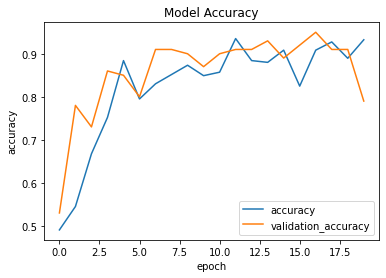

In [17]:
# Model Accuracy comparison
plt.plot(history_model.history['accuracy'])
plt.plot(history_model.history['val_accuracy'])
plt.legend(['accuracy','validation_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('Model Accuracy')
plt.show()

By looking at the graph above, we can how the model performed. Both the training accuracy and validation accuracy are stable as the epoch go by, except at the end. At the end of the epoch run, we got a dip in accuracy with 79% for the validation_accuracy.

EarlyStopping did not stop the epoch, maybe because we used patience = 7. If the patience was 5, then there's a possibility EarlyStopping would have indeed stopped earlier when the model stopped improving.

Thanks to ModelCheckpoint, it saved the best run of our model at 95% accuracy. That's epoch 17.

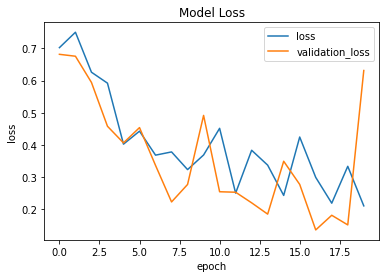

In [18]:
# Model Loss Comparison
plt.plot(history_model.history['loss'])
plt.plot(history_model.history['val_loss'])
plt.legend(['loss','validation_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('Model Loss')
plt.show()

By looking at the graph above, we can tell that the model was probably going in the direction of overfitted at the end. That's when the validation_loss began to spike.

For the most part of the training, the loss for both datasets was fairly stable.

#### Save model

Always wise to save the model. Will come in handy when we are to apply it to a real-world setting. 
Now we're going to check the model's performance on unseen data in another notebook.
With a high accuracy of 87.4% we can have a sense of idea how it will perform in a real-world setting.

In [19]:
model.save('cnn_model_v6.h5')